#### 1st trend: Cities that have higher humidity tend to have warmer temperatures. 

#### 2nd trend: The temperatures get colder as we move towards cities that are geographically located in the north hemisphere while temperatures tend to dip when we look at cities in the south. 

#### 3rd trend: Latitude has a greater effect on the temperature but not as great of an effect on humidity, amount of clouds, and the windspeed. Those three factors ddo have an effect on temperature


In [1]:
import json
import requests as req
import random
import seaborn as sns
import pandas as pd
import math as math
import time
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy 

In [2]:
api_key = "4dd6f789c85106af17aceeef258efc43"

In [3]:
location_data = pd.DataFrame()
location_data['lat_values'] = [np.random.uniform(-90,90) for x in range(1500)]
location_data['lng_values'] = [np.random.uniform(-180, 180) for x in range(1500)]

location_data.head()

,lat_values,lng_values
0,-29.367662,-142.297880
1,-26.079436,-166.002957
2,-24.279136,175.702280
3,-34.902590,-142.923572
4,-26.219270,-162.850532


In [5]:
location_data['city'] = ""
location_data['country'] = ""

count = 0
for index, row in location_data.iterrows():
    near_city = citipy.nearest_city(row['lat_values'], row['lng_values']).city_name
    near_country = citipy.nearest_city(row['lat_values'], row['lng_values']).country_code
    location_data.set_value(index,"city",near_city)
    location_data.set_value(index,"country",near_country)
location_data.head()

C:\Users\jjnun\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\jjnun\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


,lat_values,lng_values,city,country
0,-29.367662,-142.297880,mataura,pf
1,-26.079436,-166.002957,avarua,ck
2,-24.279136,175.702280,isangel,vu
3,-34.902590,-142.923572,mataura,pf
4,-26.219270,-162.850532,avarua,ck


In [6]:

len(location_data)

1500

In [7]:

location_data=location_data.drop_duplicates(['city','country'],keep = "first")

In [8]:
location_data['Temp'] = ""
location_data['Humidity'] = ""
location_data['Cloudiness'] = ""
location_data['Wind Speed'] = ""
location_data["Lat"] =""
location_data["Longitude"] =""

C:\Users\jjnun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\jjnun\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\jjnun\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [9]:

sample_size = 500

target_url = 'http://api.openweathermap.org/data/2.5/weather?q='
units = 'imperial'

In [10]:

location_data.head()

,lat_values,lng_values,city,country,Temp,Humidity,Cloudiness,Wind Speed,Lat,Longitude
0,-29.367662,-142.297880,mataura,pf,,,,,,
1,-26.079436,-166.002957,avarua,ck,,,,,,
2,-24.279136,175.702280,isangel,vu,,,,,,
5,-7.508079,131.843139,tual,id,,,,,,
6,29.724530,-117.802934,san quintin,mx,,,,,,


In [11]:
record = 0
for index, row in location_data.iterrows():
    city_name = row['city']
    country_code = row['country']
    url = target_url + city_name + ',' + country_code + '&units=' + units + '&APPID=' + api_key
    print (url)
    try: 
        weather_response = req.get(url)
        weather_json = weather_response.json()
        latitude = weather_json["coord"]["lat"]
        longitude = weather_json["coord"]["lon"]
        temp = weather_json["main"]["temp"]
        humidity = weather_json["main"]["humidity"]
        cloud = weather_json["clouds"]["all"]
        wind = weather_json["wind"]["speed"]
        location_data.set_value(index,"Temp", temp)
        location_data.set_value(index,"Humidity",humidity)
        location_data.set_value(index,"Wind Speed", wind)
        location_data.set_value(index,"Cloudiness",cloud)
        location_data.set_value(index,"Lat", latitude)
        location_data.set_value(index,"Longitude",longitude)
        print("Retrieved data for %s, %s" % (city_name, country_code))
    except:
        print("No data for %s, %s" % (city_name,country_code))
    record += 1
    if record % 59 == 0:
        time.sleep(60)

http://api.openweathermap.org/data/2.5/weather?q=mataura,pf&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
No data for mataura, pf
http://api.openweathermap.org/data/2.5/weather?q=avarua,ck&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43


C:\Users\jjnun\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Users\jjnun\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\jjnun\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\jjnun\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\jjnun\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:

Retrieved data for avarua, ck
http://api.openweathermap.org/data/2.5/weather?q=isangel,vu&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for isangel, vu
http://api.openweathermap.org/data/2.5/weather?q=tual,id&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for tual, id
http://api.openweathermap.org/data/2.5/weather?q=san quintin,mx&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
No data for san quintin, mx
http://api.openweathermap.org/data/2.5/weather?q=chokurdakh,ru&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for chokurdakh, ru
http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for ushuaia, ar
http://api.openweathermap.org/data/2.5/weather?q=albany,au&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for albany, au
http://api.openweathermap.org/data/2.5/weather?q=porto velho,br&units=imperial&APPID=4dd6f789c85106af

Retrieved data for okhotsk, ru
http://api.openweathermap.org/data/2.5/weather?q=shubarkuduk,kz&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for shubarkuduk, kz
http://api.openweathermap.org/data/2.5/weather?q=leningradskiy,ru&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for leningradskiy, ru
http://api.openweathermap.org/data/2.5/weather?q=barrow,us&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
No data for barrow, us
http://api.openweathermap.org/data/2.5/weather?q=vrangel,ru&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for vrangel, ru
http://api.openweathermap.org/data/2.5/weather?q=mandalgovi,mn&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for mandalgovi, mn
http://api.openweathermap.org/data/2.5/weather?q=itarema,br&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for itarema, br
http://api.openweathermap.org/data/2.5/weather?q=constitucion,cl&units=imperial&AP

Retrieved data for dikson, ru
http://api.openweathermap.org/data/2.5/weather?q=gobabis,na&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for gobabis, na
http://api.openweathermap.org/data/2.5/weather?q=dingle,ie&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for dingle, ie
http://api.openweathermap.org/data/2.5/weather?q=khonuu,ru&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
No data for khonuu, ru
http://api.openweathermap.org/data/2.5/weather?q=barranca,pe&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for barranca, pe
http://api.openweathermap.org/data/2.5/weather?q=azimur,ma&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
No data for azimur, ma
http://api.openweathermap.org/data/2.5/weather?q=bandarbeyla,so&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for bandarbeyla, so
http://api.openweathermap.org/data/2.5/weather?q=guerrero negro,mx&units=imperial&APPID=4dd6f789c85106af17acee

Retrieved data for ngama, td
http://api.openweathermap.org/data/2.5/weather?q=mahebourg,mu&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for mahebourg, mu
http://api.openweathermap.org/data/2.5/weather?q=kodinsk,ru&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for kodinsk, ru
http://api.openweathermap.org/data/2.5/weather?q=baykalsk,ru&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for baykalsk, ru
http://api.openweathermap.org/data/2.5/weather?q=havre-saint-pierre,ca&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for havre-saint-pierre, ca
http://api.openweathermap.org/data/2.5/weather?q=aksu,cn&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for aksu, cn
http://api.openweathermap.org/data/2.5/weather?q=riyadh,sa&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for riyadh, sa
http://api.openweathermap.org/data/2.5/weather?q=kieta,pg&units=imperial&APPID=4d

Retrieved data for kisangani, cd
http://api.openweathermap.org/data/2.5/weather?q=ixtapa,mx&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for ixtapa, mx
http://api.openweathermap.org/data/2.5/weather?q=cherskiy,ru&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for cherskiy, ru
http://api.openweathermap.org/data/2.5/weather?q=pisco,pe&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for pisco, pe
http://api.openweathermap.org/data/2.5/weather?q=berlevag,no&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for berlevag, no
http://api.openweathermap.org/data/2.5/weather?q=guarapuava,br&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for guarapuava, br
http://api.openweathermap.org/data/2.5/weather?q=kindersley,ca&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for kindersley, ca
http://api.openweathermap.org/data/2.5/weather?q=komsomolskiy,ru&units=imperial&APPID=4

Retrieved data for ribeira grande, pt
http://api.openweathermap.org/data/2.5/weather?q=guasave,mx&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for guasave, mx
http://api.openweathermap.org/data/2.5/weather?q=stolin,by&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for stolin, by
http://api.openweathermap.org/data/2.5/weather?q=middelburg,za&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for middelburg, za
http://api.openweathermap.org/data/2.5/weather?q=sao filipe,cv&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for sao filipe, cv
http://api.openweathermap.org/data/2.5/weather?q=arraial do cabo,br&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for arraial do cabo, br
http://api.openweathermap.org/data/2.5/weather?q=harper,lr&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for harper, lr
http://api.openweathermap.org/data/2.5/weather?q=piney green,us&unit

Retrieved data for merauke, id
http://api.openweathermap.org/data/2.5/weather?q=husavik,is&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for husavik, is
http://api.openweathermap.org/data/2.5/weather?q=bagepalli,in&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for bagepalli, in
http://api.openweathermap.org/data/2.5/weather?q=houston,ca&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for houston, ca
http://api.openweathermap.org/data/2.5/weather?q=morgan city,us&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for morgan city, us
http://api.openweathermap.org/data/2.5/weather?q=coquimbo,cl&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for coquimbo, cl
http://api.openweathermap.org/data/2.5/weather?q=santiago de chuco,pe&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for santiago de chuco, pe
http://api.openweathermap.org/data/2.5/weather?q=westport,ie&unit

Retrieved data for fontem, cm
http://api.openweathermap.org/data/2.5/weather?q=inta,ru&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for inta, ru
http://api.openweathermap.org/data/2.5/weather?q=great falls,us&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for great falls, us
http://api.openweathermap.org/data/2.5/weather?q=andenes,no&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for andenes, no
http://api.openweathermap.org/data/2.5/weather?q=jesus,py&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for jesus, py
http://api.openweathermap.org/data/2.5/weather?q=koumac,nc&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for koumac, nc
http://api.openweathermap.org/data/2.5/weather?q=bababe,mr&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
No data for bababe, mr
http://api.openweathermap.org/data/2.5/weather?q=gorontalo,id&units=imperial&APPID=4dd6f789c85106af17aceeef258efc

Retrieved data for lavrentiya, ru
http://api.openweathermap.org/data/2.5/weather?q=valreas,fr&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for valreas, fr
http://api.openweathermap.org/data/2.5/weather?q=barabinsk,ru&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for barabinsk, ru
http://api.openweathermap.org/data/2.5/weather?q=innisfail,au&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for innisfail, au
http://api.openweathermap.org/data/2.5/weather?q=colinas,br&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for colinas, br
http://api.openweathermap.org/data/2.5/weather?q=batagay-alyta,ru&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for batagay-alyta, ru
http://api.openweathermap.org/data/2.5/weather?q=avera,pf&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
No data for avera, pf
http://api.openweathermap.org/data/2.5/weather?q=acopiara,br&units=imperial&APPID=4dd6f

Retrieved data for berja, es
http://api.openweathermap.org/data/2.5/weather?q=liniere,ca&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
No data for liniere, ca
http://api.openweathermap.org/data/2.5/weather?q=huancavelica,pe&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for huancavelica, pe
http://api.openweathermap.org/data/2.5/weather?q=manaure,co&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for manaure, co
http://api.openweathermap.org/data/2.5/weather?q=kristiansund,no&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for kristiansund, no
http://api.openweathermap.org/data/2.5/weather?q=ca mau,vn&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for ca mau, vn
http://api.openweathermap.org/data/2.5/weather?q=nortelandia,br&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for nortelandia, br
http://api.openweathermap.org/data/2.5/weather?q=port elizabeth,za&units=imperial&

Retrieved data for santa rosa, ar
http://api.openweathermap.org/data/2.5/weather?q=conceicao do araguaia,br&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for conceicao do araguaia, br
http://api.openweathermap.org/data/2.5/weather?q=piacabucu,br&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for piacabucu, br
http://api.openweathermap.org/data/2.5/weather?q=starogard gdanski,pl&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for starogard gdanski, pl
http://api.openweathermap.org/data/2.5/weather?q=inirida,co&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for inirida, co
http://api.openweathermap.org/data/2.5/weather?q=chenzhou,cn&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for chenzhou, cn
http://api.openweathermap.org/data/2.5/weather?q=svetlogorsk,ru&units=imperial&APPID=4dd6f789c85106af17aceeef258efc43
Retrieved data for svetlogorsk, ru
http://api.openweathermap.org/data

In [14]:
location_data.head(20)

,lat_values,lng_values,city,country,Temp,Humidity,Cloudiness,Wind Speed,Lat,Longitude
0,-29.367662,-142.297880,mataura,pf,,,,,,
1,-26.079436,-166.002957,avarua,ck,78.8,94,90,6.93,-21.21,-159.78
2,-24.279136,175.702280,isangel,vu,78.85,100,8,14.32,-19.55,169.27
5,-7.508079,131.843139,tual,id,84.52,96,92,11.74,-5.67,132.75
6,29.724530,-117.802934,san quintin,mx,,,,,,
7,87.874280,150.851907,chokurdakh,ru,-32.57,58,76,7.05,70.62,147.9
8,-73.029434,-57.153578,ushuaia,ar,59.77,25,40,24.16,-54.81,-68.31
9,-88.966513,94.998239,albany,au,57.2,82,90,4.7,-35.02,117.88
10,-9.250154,-63.549714,porto velho,br,88.84,69,0,3.02,-8.75,-63.87
12,10.059930,63.612080,kavaratti,in,82,100,80,9.4,10.57,72.64


In [15]:
len(location_data)

612

In [16]:
location_data.to_csv("weatherpy_data.csv", encoding="utf-8", index=False)

In [17]:
location_data['Lat'] = pd.to_numeric(location_data['Lat'], errors = 'coerce')
location_data['Temp'] = pd.to_numeric(location_data['Temp'], errors = 'coerce')
location_data['Humidity'] = pd.to_numeric(location_data['Humidity'], errors = 'coerce')
location_data['Wind Speed'] = pd.to_numeric(location_data['Wind Speed'], errors = 'coerce')
location_data['Cloudiness'] = pd.to_numeric(location_data['Cloudiness'], errors = 'coerce')

C:\Users\jjnun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\jjnun\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\jjnun\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [18]:
location_data.head()

,lat_values,lng_values,city,country,Temp,Humidity,Cloudiness,Wind Speed,Lat,Longitude
0,-29.367662,-142.297880,mataura,pf,NaN,NaN,NaN,NaN,NaN,
1,-26.079436,-166.002957,avarua,ck,78.80,94.0,90.0,6.93,-21.21,-159.78
2,-24.279136,175.702280,isangel,vu,78.85,100.0,8.0,14.32,-19.55,169.27
5,-7.508079,131.843139,tual,id,84.52,96.0,92.0,11.74,-5.67,132.75
6,29.724530,-117.802934,san quintin,mx,NaN,NaN,NaN,NaN,NaN,


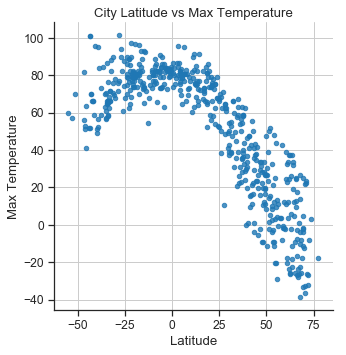

In [23]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('Lat',
          'Temp',
          data=location_data,
          fit_reg=False,
          scatter_kws={"marker": "o",
                        "s": 20})
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("City Latitude vs Max Temperature")
plt.show()

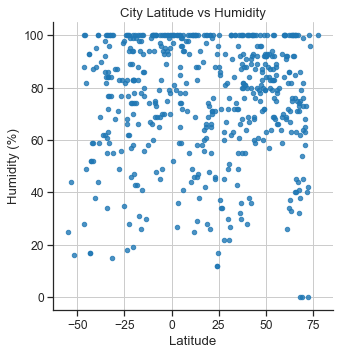

In [24]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('Lat',
          'Humidity',
          data=location_data,
          fit_reg=False,
          scatter_kws={"marker": "o",
                        "s": 20})
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")
plt.show()

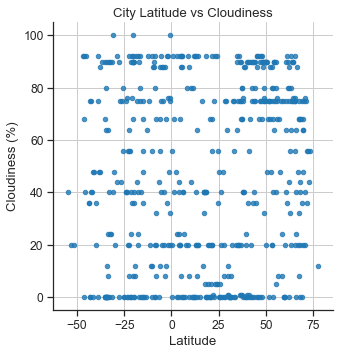

In [25]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('Lat',
          'Cloudiness',
          data=location_data,
          fit_reg=False,
          scatter_kws={"marker": "o",
                        "s": 20})
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")
plt.show()

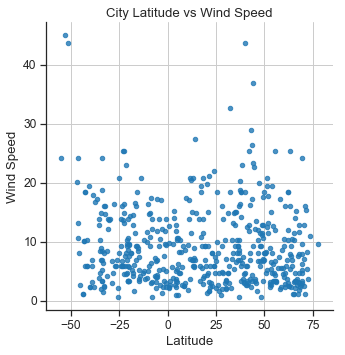

In [26]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('Lat',
          'Wind Speed',
          data=location_data,
          fit_reg=False,
          scatter_kws={"marker": "o",
                        "s": 20})
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs Wind Speed")
plt.show()